In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor
import pywt

In [3]:
folder='../datasets'
filename='gold-prices.csv'
fname=f"{folder}/{filename}"
import os.path
os.path.isfile(fname) 

True

In [4]:
df = pd.read_csv(fname, header=None, usecols=[0], names=['data'], 
                 thousands=',',dtype={'data':np.float64}, verbose=True)
# lineterminator=','  --> user for certain CSV files

Tokenization took: 0.52 ms
Type conversion took: 0.86 ms
Parser memory cleanup took: 0.01 ms


In [5]:
df

,data
0,226.0
1,226.0
2,226.8
3,218.6
4,223.2
...,...
10611,1526.0
10612,1537.9
10613,1546.1
10614,1529.1


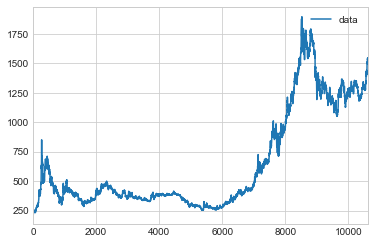

In [7]:
df.plot.line()

In [23]:
coef, freqs = pywt.cwt(df['data'].tolist(),[1], 'morl')

In [24]:
print(coef)

[[ 1.74375524e-02 -2.77750704e+01 -2.01538945e+00 ... -8.04627373e-01
  -8.61219144e+00 -1.85525975e+02]]


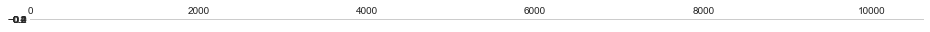

In [25]:
plt.matshow(coef)
plt.show()

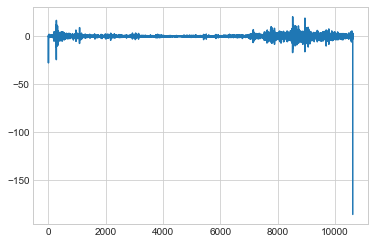

In [26]:
plt.plot(coef[0])

In [22]:
print(freqs)

[0.8125     0.40625    0.27083333 0.203125   0.1625     0.13541667
 0.11607143 0.1015625  0.09027778 0.08125    0.07386364 0.06770833
 0.0625     0.05803571 0.05416667 0.05078125 0.04779412 0.04513889
 0.04276316 0.040625   0.03869048 0.03693182 0.03532609 0.03385417
 0.0325     0.03125    0.03009259 0.02901786 0.02801724 0.02708333
 0.02620968 0.02539062 0.02462121 0.02389706 0.02321429 0.02256944
 0.02195946 0.02138158 0.02083333 0.0203125  0.01981707 0.01934524
 0.01889535 0.01846591 0.01805556 0.01766304 0.01728723 0.01692708
 0.01658163 0.01625    0.01593137 0.015625   0.01533019 0.0150463
 0.01477273 0.01450893 0.01425439 0.01400862 0.01377119 0.01354167
 0.01331967 0.01310484 0.01289683 0.01269531 0.0125     0.01231061
 0.01212687 0.01194853 0.01177536 0.01160714 0.01144366 0.01128472
 0.01113014 0.01097973 0.01083333 0.01069079 0.01055195 0.01041667
 0.01028481 0.01015625 0.01003086 0.00990854 0.00978916 0.00967262
 0.00955882 0.00944767 0.00933908 0.00923295 0.00912921 0.00902

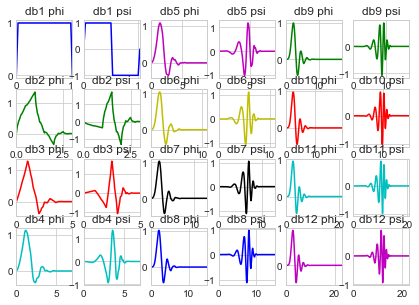

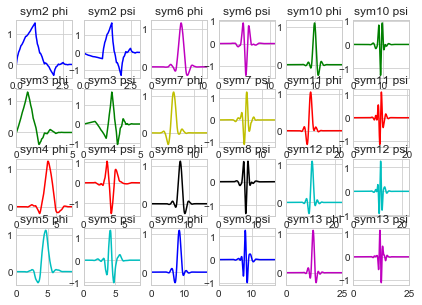

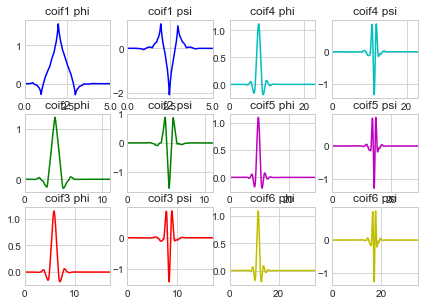

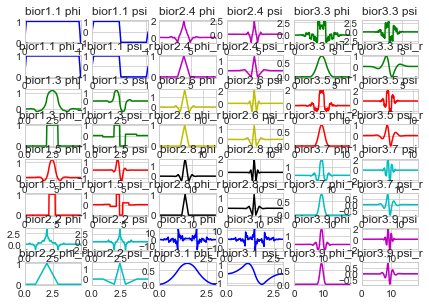

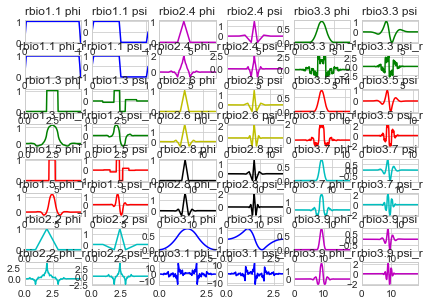

In [30]:
import itertools

import matplotlib.pyplot as plt

import pywt


plot_data = [('db', (4, 3)),
             ('sym', (4, 3)),
             ('coif', (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)

    colors = itertools.cycle('bgrcmyk')
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color)
            ax.set_xlim(min(x), max(x))

plt.show()